In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [ ]:
# Change the working directory
path_to_folder = "SEM2/ENPM673/HW1"
%cd /content/drive/My\ Drive/{path_to_folder}

/content/drive/My Drive/SEM2/ENPM673/HW1


In [ ]:
#importing modules
from ast import Pass
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

# Creating a VideoCapture object and reading from input file
cap = cv2.VideoCapture('object_tracking.mp4')
#capturing the fps of the video
fps = cap.get(cv2.CAP_PROP_FPS)
#creating emmpty list of centroid
centroid=[]
#creating frame counter
frame_counter=0
print(f"{fps} Frames per second")

# Checking if camera opened successfully
if (cap.isOpened()== False):
  print("Error opening video stream or file")

# Reading until video is completed
while(cap.isOpened()):
  # Captureing frame-by-frame
  ret, frame = cap.read()
  if ret == True:
    #incrementing frame counter
    frame_counter+=1
    #Converting BGR to Graysclae to reduce the channel of colors
    image=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    #saving the 450th frame, which will be used later to display trajectory on
    if frame_counter==450:
      saved_frame=frame
    #Binary thresolding a grayscale frame to capture the moving dark object
    ret,thres=cv2.threshold(image,20,255,cv2.THRESH_BINARY)
    #Creating a mask variable to get the centroid of the moving object
    mask=np.where(thres==0)
    #creating condition if at all there are pixels with zero values
    if(mask[1].size>0):
      #Getting rightmost pixel with zero value
      max_x=(max(mask[0]))
      #Getting leftmost pixel with zero value
      min_x=(min(mask[0]))
      #Getting bottommost pixel with zero value
      max_y=(max(mask[1]))
      #Getting upmost pixel with zero value
      min_y=(min(mask[1]))
      #calc avg values
      Avg_x=int((max_x+min_x)/2)
      Avg_y=int((max_y+min_y)/2)
      #appending centroids in list
      centroid.append((Avg_y,Avg_x))

    else: pass

    # Press Q on keyboard to  exit
    if cv2.waitKey(25) & 0xFF == ord('q'):
      break

  # Break the loop
  else:
    break
#converting list to numpy array
centroid_np=np.array(centroid)
print("Answer Q3 :")
print("Calculated the Centroid of moving object in all the frames : ", centroid_np)
cap.release()



90000.0 Frames per second
Answer Q3 :
Calculated the Centroid of moving object in all the frames :  [[   0  979]
 [   0  979]
 [   0  979]
 ...
 [1914 1064]
 [1914 1064]
 [1914 1064]]


In [ ]:
'''
Equation of parabola: y = a*x^2+b*x+c
[Y] = [A][X] , Where Y is [mx1], A is [mx3], X is [3x1]=[a,b,c] row of unknown coeffients
[A.T][Y]=[A.T][A][X]
[([A.T][A])^-1][A.T][Y]=[X]
x=(ATA)^-1*ATy
'''
#creating array as mentioned in comment above
A=np.array([[x_value**2,x_value,1] for x_value,_ in centroid_np])
Y=np.array([y_value for _,y_value in centroid_np ])
# Matrix multiplication
AT_A = np.dot(A.T, A)
AT_Y = np.dot(A.T, Y.T)
#inverse of the matrix
inv_AT_A = np.linalg.inv(AT_A)
#gettig the values of coefficient by matrix multiplication
a, b, c = np.dot(inv_AT_A, AT_Y.T)

print("Answer Q4 :")
print("Equation of an parabola using Least square curve fitting of centroid points is"
        ,round(a,5),"x^2 + ",round(b,5),"x + ",round(c,5))

'''
Answer to question 5
'''
x=1000
#Fitting in X=1000 value in the equation of parabola and getting the Y value
y = a * x ** 2 + b * x + c
print("Answer Q5 :")
print("Value of Y axis at x=1000 in the parabola eqn is: ",y)


Answer Q4 :
Equation of an parabola using Least square curve fitting of centroid points is 0.00064 x^2 +  -1.24156 x +  986.17898
Answer Q5 :
Value of Y axis at x=1000 in the parabola eqn is:  389.1451760882168


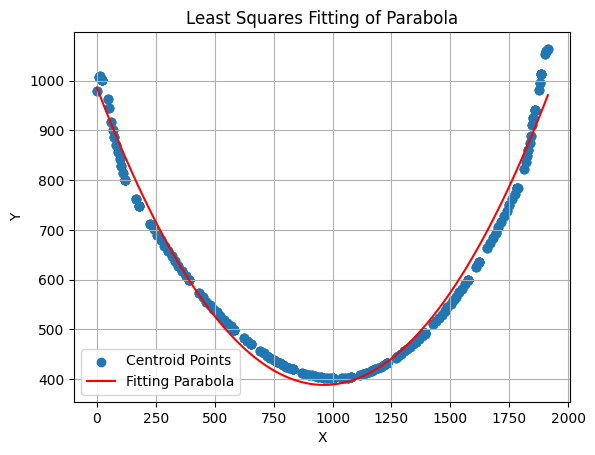

In [ ]:
# Ploting the centroid and the fitting parabola
plt.scatter(centroid_np[:,0], centroid_np[:,1], label='Centroid Points')
#creating linear spaced points of x value
x_curve = np.linspace(min(centroid_np[:,0]), max(centroid_np[:,0]), 100)
y_curve = a * x_curve ** 2 + b * x_curve + c
#plotting x_curve and y_curve
plt.plot(x_curve, y_curve, color='red', label='Fitting Parabola')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Least Squares Fitting of Parabola')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#plotting the centroids and fitted parabola curve on saved image
#converting into grayscale
gray=cv2.cvtColor(saved_frame,cv2.COLOR_BGR2GRAY)
#Appling binary threshold
ret,thres=cv2.threshold(gray,20,255,cv2.THRESH_BINARY)
#gettign the location of pixels with zero pixel values
mask=np.where(thres==0)
max_x=(max(mask[0]))
min_x=(min(mask[0]))
max_y=(max(mask[1]))
min_y=(min(mask[1]))
Avg_x=int((max_x+min_x)/2)
Avg_y=int((max_y+min_y)/2)
#copying the saved frame
circle_img = saved_frame.copy()
#Creating a filled circular point at the centroid of the given image for visualisation
cv2.circle(circle_img,(int(Avg_y),int(Avg_x)), 5, (255,0,25), 5)

#Fitting Parabola in the image
for x_val1 in  range(1920):
    y_val1 = int(a * x_val1 ** 2 + b * x_val1 + c)
    cv2.circle(circle_img, (x_val1, y_val1), 3, (0, 0, 250), -1)
#Plotting the centroid of the object in each frame
for i in range(len(centroid_np)):
    cv2.circle(circle_img, (centroid_np[i,0], centroid_np[i,1]), 3, (250, 0, 0), -1)




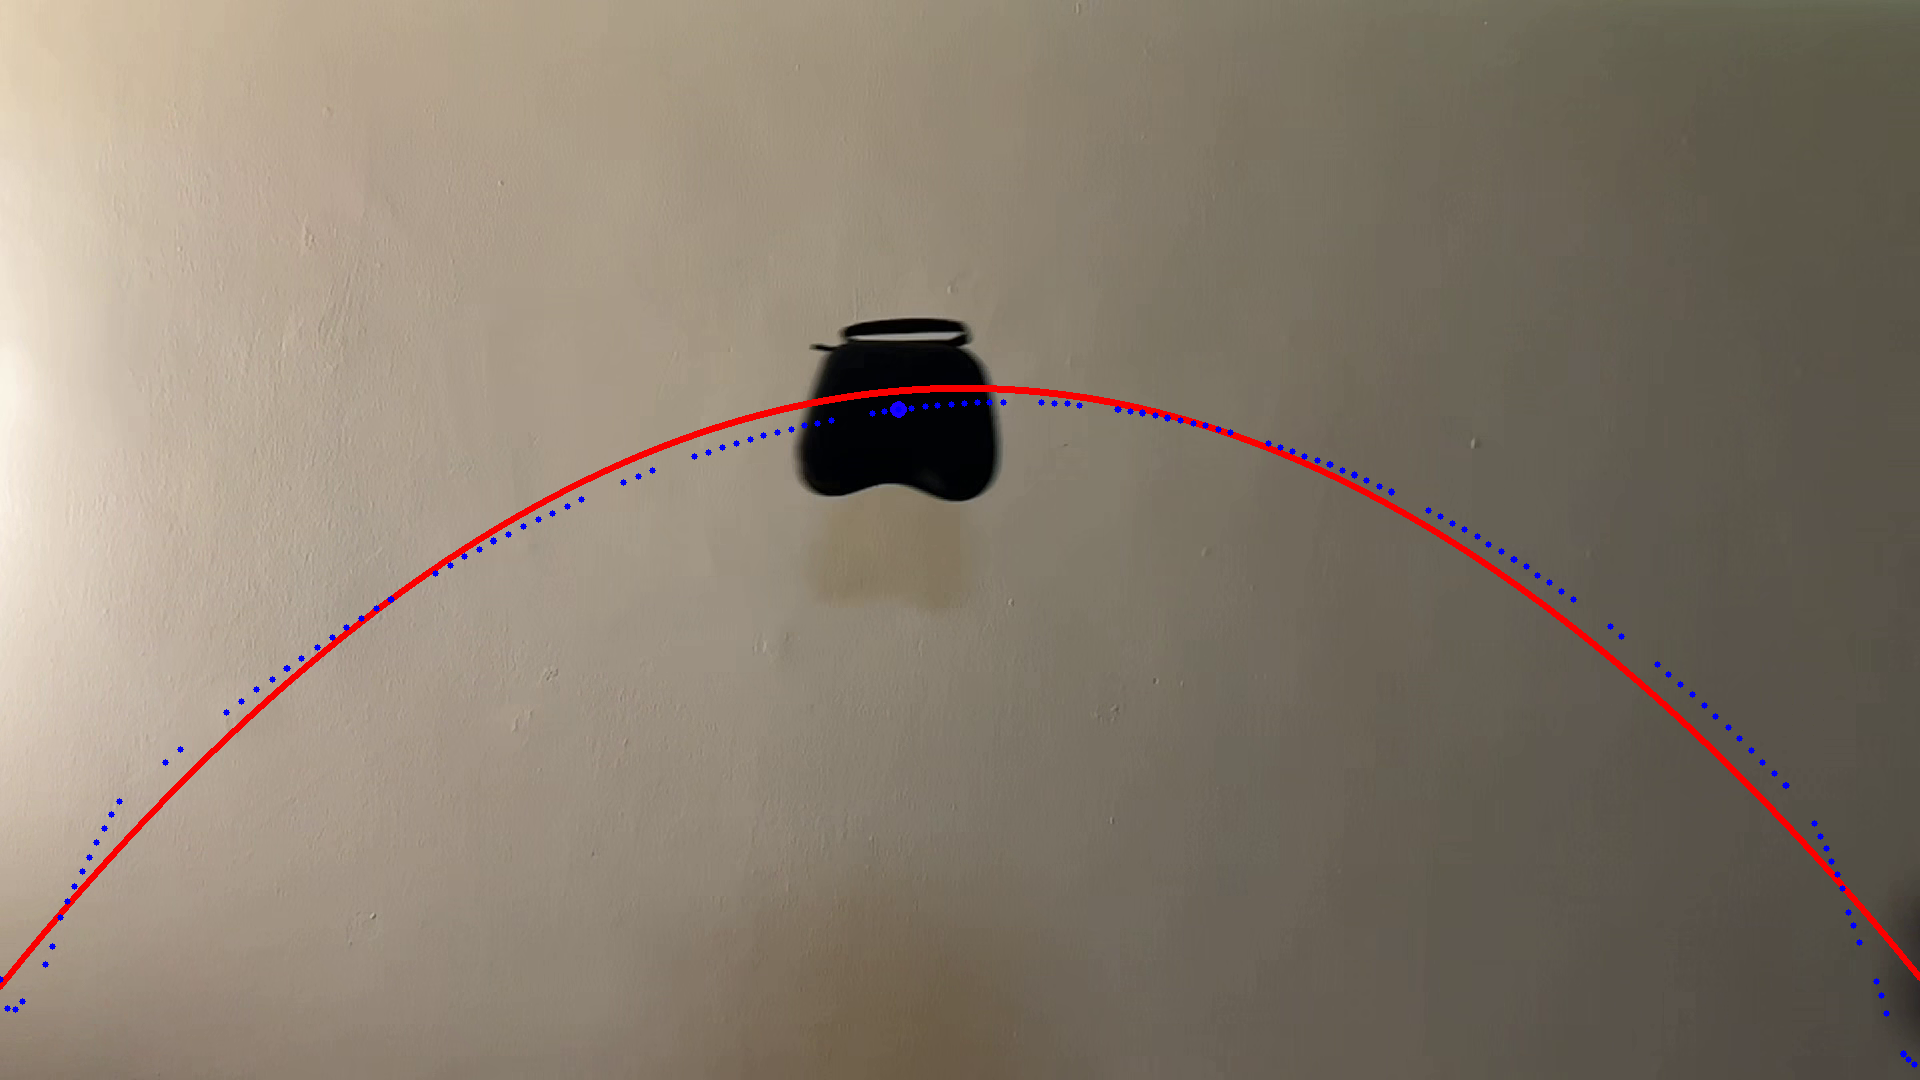

In [ ]:
cv2_imshow(circle_img)
k=cv2.waitKey(0)
cv2.destroyAllWindows()